In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

C:\Users\CG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**ITERATIVELY REWEIGHTED LEAST SQUARES ( IRLS )**

In [2]:
X=pd.read_csv("ENB2012_data.csv")
P=X.copy()
test = X[int(X.shape[0]*0.7):]
x_test = test.iloc[:,:8]
x_test=x_test.values
x_test  =x_test.reshape(-1,8)
y1_test = test.iloc[:,-2]
y2_test = test.iloc[:,-1]

In [3]:
X.head(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


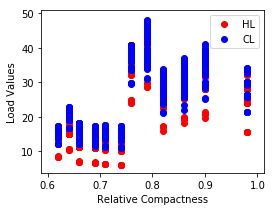

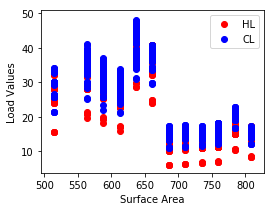

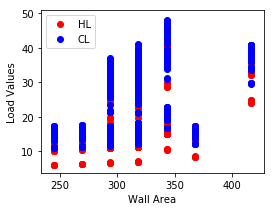

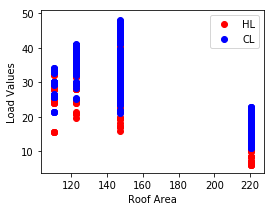

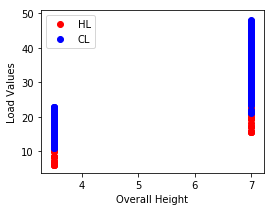

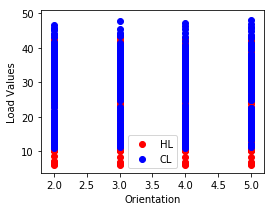

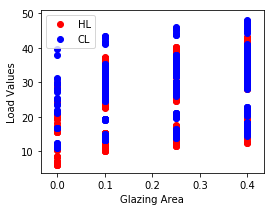

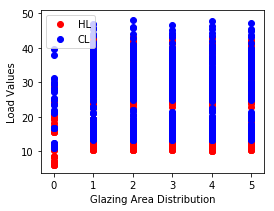

<Figure size 288x216 with 0 Axes>

In [4]:
Xa=X['Relative Compactness']
Xb=X['Surface Area']
Xc=X['Wall Area']
Xd=X['Roof Area']
Xe=X['Overall Height']
Xf=X['Orientation']
Xg=X['Glazing Area']
Xh=X['Glazing Area Distribution']
#print(Xa)
Xa=Xa.values
Xb=Xb.values
Xc=Xc.values
Xd=Xd.values
Xe=Xe.values
Xf=Xf.values
Xg=Xg.values
Xh=Xh.values
#Xa=Xa.reshape(-1,1)
Ya=X['Heating Load']
Ya=Ya.values
Ya=Ya.reshape(-1,1)
Yb=X['Cooling Load']
Yb=Yb.values
Yb=Yb.reshape(-1,1)
fig = plt.figure(figsize=(4,3))
fig.subplots_adjust(hspace=1,wspace=1)
plt.scatter(Xa,Ya,label='HL',color='red')
plt.scatter(Xa,Yb,label='CL',color='blue')
plt.xlabel('Relative Compactness')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xb,Ya,label='HL',color='red')
plt.scatter(Xb,Yb,label='CL',color='blue')
plt.xlabel('Surface Area')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xc,Ya,label='HL',color='red')
plt.scatter(Xc,Yb,label='CL',color='blue')
plt.xlabel('Wall Area')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xd,Ya,label='HL',color='red')
plt.scatter(Xd,Yb,label='CL',color='blue')
plt.xlabel('Roof Area')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xe,Ya,label='HL',color='red')
plt.scatter(Xe,Yb,label='CL',color='blue')
plt.xlabel('Overall Height')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xf,Ya,label='HL',color='red')
plt.scatter(Xf,Yb,label='CL',color='blue')
plt.xlabel('Orientation')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xg,Ya,label='HL',color='red')
plt.scatter(Xg,Yb,label='CL',color='blue')
plt.xlabel('Glazing Area')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))
plt.scatter(Xh,Ya,label='HL',color='red')
plt.scatter(Xh,Yb,label='CL',color='blue')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Load Values')
plt.legend()
plt.show()
fig = plt.figure(figsize=(4,3))

In [5]:
meanY1=X['Heating Load'].mean()
meanY2=X['Cooling Load'].mean()
stdY1=X['Heating Load'].std()
stdY2=X['Cooling Load'].std()
P.drop(['Heating Load','Cooling Load'], axis=1 ,inplace= True)
meanX=P.mean()
stdX=P.std()
meanX=meanX.values
stdX=stdX.values
meanX=meanX.reshape(-1,8)
stdX=stdX.reshape(-1,8)

In [6]:
scaler = StandardScaler()
col = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns=col)

In [7]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670116,-0.342666
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670116,-0.342666
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670116,-0.342666
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670116,-0.342666
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366


In [8]:
train = X[:int(X.shape[0]*0.7)]
x  = train.iloc[:,:8]
y1 = train.iloc[:,-2]
y2 = train.iloc[:,-1]
x  =x.values
y1 =y1.values
y2=y2.values
x  =x.reshape(-1,8)
y1 =y1.reshape(-1,1)
y2=y2.reshape(-1,1)
        # test = X[int(X.shape[0]*0.8):]
        # x_test = test.iloc[:,:8]
        # y1_test = test.iloc[:,-2]
        # y2_test = test.iloc[:,-1]
        # x_test=x_test.values
        #y1_test=y1_test.values
        # y2_test=y2_test.values
        # x_test  =x_test.reshape(-1,8)
        #y1_test =y1_test.reshape(-1,1)
        # y2_test=y2_test.reshape(-1,1)
        #print(y1_test)
        #print(meanY1)
        #print(meanX)
        #print(stX)
        #print(x1)
        #X=pd.DataFrame(X)
        #X.values
        #print(X)
        #p=p.values
        #p=p.reshape(-1,8)
        #print(p)


In [9]:
def calculate_weight(x,y,lr,epoch,pr,th):
    x=np.insert(x,0,1,axis=1)
    theta=np.zeros(len(x[0]))
    m=y.size
    #old_error,error=0,0
    
      #print(m)
    for i in range(epoch):
        h=(x@theta).reshape(-1,1)
        error=((y-h)**2).mean()
        theta=theta-lr*(1/m)*(x.T.dot(h-y)).reshape(-1)
        sse=sum((y-h)**2)
        t=y.mean()
        sst=sum((y-t)**2)
        j=1-(sse/sst)
        if(th==1):
            acc1.append(j)
            loss1.append(error)
        elif(th==2):
            acc2.append(j)
            loss2.append(error)
        #print(i+1,error) if not i%pr else""   
    #print(i+1,error)
    #Goodness of fit or Accuracy
    #sse=sum((y-h)**2)
    #t=y.mean()
    #sst=sum((y-t)**2)
    if th==1:
        #print("Accuracy of Heating Load (HL) using IRLS = ",1-(sse/sst))
        return loss1,acc1,theta
    elif th==2:
        #print("\n\nAccuracy of Cooling Load (CL) using IRLS = ",1-(sse/sst))
        return loss2,acc2,theta

def Predict(p,theta):
    p=(p-meanX)/stdX
    x=np.insert(p,0,1,axis=1)
    return x.dot(theta)   

In [10]:
acc1=[]
acc2=[]
loss1=[]
loss2=[]
# x_test = test.iloc[100:101,:8]
# x_test=x_test.values
# x_test=x_test.reshape(-1,8)
# x_test=[[0.76,661.5,416.5,122.5,7,4,0.4,5]]
loss1,acc1,theta1=calculate_weight(x,y1,0.53,900,100,1)
y1_te=Predict(x_test,theta1)
y1_te=y1_te.reshape(-1,1)
y1_te=(y1_te*stdY1)+meanY1
loss2,acc2,theta2=calculate_weight(x,y2,0.53,900,100,2)
y2_te=Predict(x_test,theta2)
y2_te=y2_te.reshape(-1,1)
y2_te=(y2_te*stdY2)+meanY2
x_te=np.arange(0,231,1)    
x_acc=np.arange(0,900)

# print("Value of HL predicted = ",y1_te)
# print("Value of CL predicted = ",y2_te)



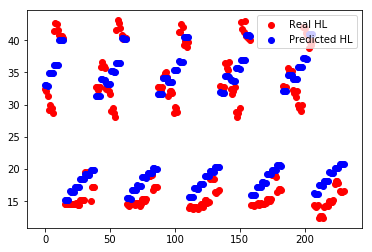

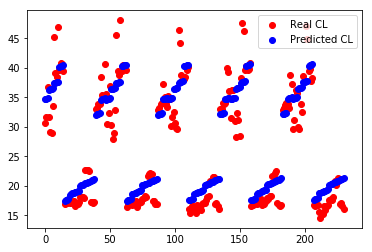

In [11]:
plt.scatter(x_te,y1_test,label='Real HL',color='red')
plt.scatter(x_te,y1_te,label='Predicted HL',color='blue')
plt.legend(loc=1)
plt.show()
plt.scatter(x_te,y2_test,label='Real CL',color='red')
plt.scatter(x_te,y2_te,label='Predicted CL',color='blue')
plt.legend(loc=1)
plt.show()

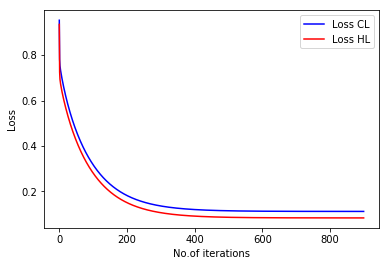

Loss of Heating Load (HL) using IRLS =  0.08360050799936622

Loss of Cooling Load (CL) using IRLS =  0.11215521945869451


In [12]:
plt.plot(x_acc,loss2,label='Loss CL',color='blue')
plt.plot(x_acc,loss1,label='Loss HL',color='red')
plt.xlabel('No.of iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Loss of Heating Load (HL) using IRLS = ",loss1[-1])
print("\nLoss of Cooling Load (CL) using IRLS = ",loss2[-1])

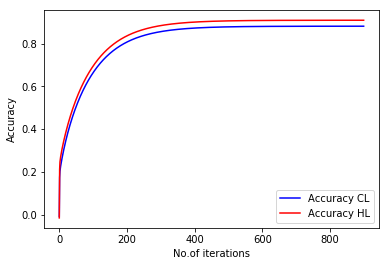

Accuracy of Heating Load (HL) using IRLS =  [0.90921314]

Accuracy of Cooling Load (CL) using IRLS =  [0.88133621]


In [13]:
plt.plot(x_acc,acc2,label='Accuracy CL',color='blue')
plt.plot(x_acc,acc1,label='Accuracy HL',color='red')
plt.xlabel('No.of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Accuracy of Heating Load (HL) using IRLS = ",acc1[-1])
print("\nAccuracy of Cooling Load (CL) using IRLS = ",acc2[-1])

**RANDOM FOREST ( RF )**

In [14]:
X=pd.read_csv("ENB2012_data.csv")
X=pd.DataFrame(X)
X=X.reindex(np.random.permutation(X.index))
#print(X)
X.values
train = X[:int(X.shape[0]*0.7)]
x_train = train.iloc[:,:8]
y1_train = train.iloc[:,-2]
y2_train = train.iloc[:,-1]
test = X[int(X.shape[0]*0.7):]
x_test = test.iloc[:,:8]
y1_test = test.iloc[:,-2]
y2_test = test.iloc[:,-1]

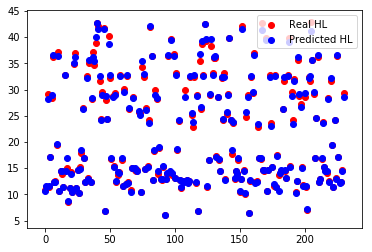

Accuracy of Heating Load (HL) using RF =  0.9977093179017857


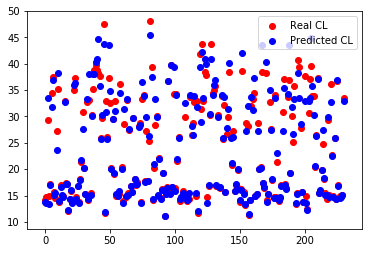


Accuracy of Cooling Load (CL) using RF =  0.9662224092604985


In [15]:
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf1.fit(x_train, y1_train)

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2.fit(x_train, y2_train)

x_te=np.arange(0,231,1)
y1_cap=rf1.predict(x_test)
plt.scatter(x_te,y1_test,label='Real HL',color='red')
plt.scatter(x_te,y1_cap,label='Predicted HL',color='blue')
plt.legend(loc=1)
plt.show()
print("Accuracy of Heating Load (HL) using RF = ",rf1.score(x_test, y1_test))
y2_cap=rf2.predict(x_test)
plt.scatter(x_te,y2_test,label='Real CL',color='red')
plt.scatter(x_te,y2_cap,label='Predicted CL',color='blue')
plt.legend(loc=1)
plt.show()

print("\nAccuracy of Cooling Load (CL) using RF = ",rf2.score(x_test, y2_test))

# x_temp=[[0.76,661.5,416.5,122.5,7,4,0.4,5]]
# print("Value of HL predicted = ",rf1.predict(x_temp))
# print("Value of CL predicted = ",rf2.predict(x_temp))